In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2, L1, l1_l2

In [2]:
# Load income data
df0 = pd.read_csv('income_dataset.csv')

In [3]:
# Begin data exploration
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df0.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df0.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df0[df0['income']=='<=50K'].count()

,0
age,24720
workclass,24720
fnlwgt,24720
education,24720
education.num,24720
marital.status,24720
occupation,24720
relationship,24720
race,24720
sex,24720


In [7]:
# Replace all '?' with nan
df0 = df0.replace('?', np.nan)
df0.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


In [27]:
df0_drop = df0.dropna()
df0_drop.info()

pct_rows_dropped = (len(df0)-len(df0_drop))/len(df0)*100
print(f'\nDropping all rows with unknown values results in a loss of {pct_rows_dropped:.2f}% of data.')

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Dropping all rows with unknown values results in a loss of 7.37% of data.


In [28]:
# Impute missing values using most common value for each column with missing values
mode_workclass = df0['workclass'].mode()[0]
mode_occupation = df0['occupation'].mode()[0]
mode_country = df0['native.country'].mode()[0]

df1 = df0.copy()
df1['workclass'] = df1['workclass'].fillna(mode_workclass)
df1['occupation'] = df1['occupation'].fillna(mode_occupation)
df1['native.country'] = df1['native.country'].fillna(mode_country)

# Visualizations

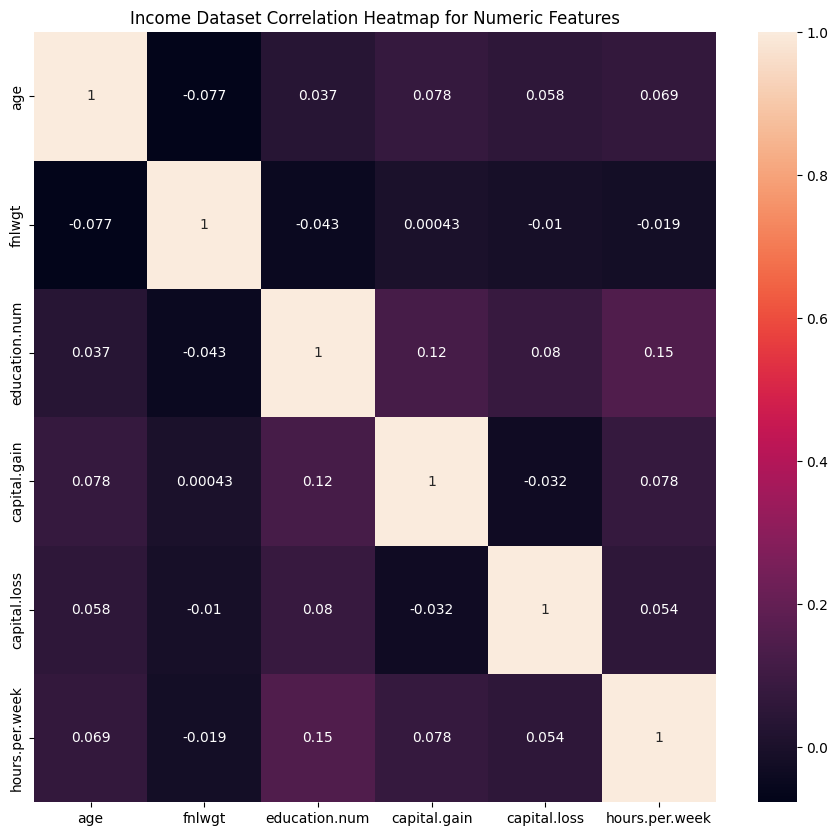

In [29]:
fig = plt.figure(figsize=(11, 10))
ax = sns.heatmap(data=df1[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week' ]].corr(), annot=True)
plt.title('Income Dataset Correlation Heatmap for Numeric Features')
plt.savefig('income_heatmap.png', bbox_inches = 'tight')
plt.show()

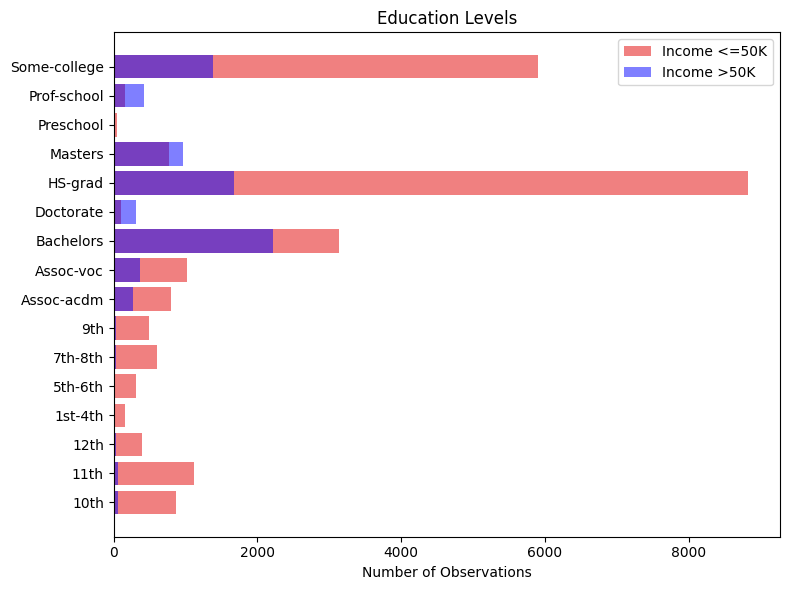

In [32]:
# Visualize education and income level
hi_income = df1[df1['income']=='>50K']
lo_income = df1[df1['income']=='<=50K']

edu_lo = list(df1['education'].unique())
edu_lo.sort()
edu_hi = hi_income.groupby('education')['income'].count().index.to_list()
edu_hi.sort()

plt.figure(figsize=(8, 6))
plt.barh(edu_lo, lo_income.groupby('education')['income'].count(), color='lightcoral', label='Income <=50K')
plt.barh(edu_hi, hi_income.groupby('education')['income'].count(), color='blue', alpha=0.5, label='Income >50K')
plt.xlabel('Number of Observations')
plt.title('Education Levels')
plt.legend()
plt.tight_layout()
plt.savefig('edu_bars.png', bbox_inches='tight')
plt.show()

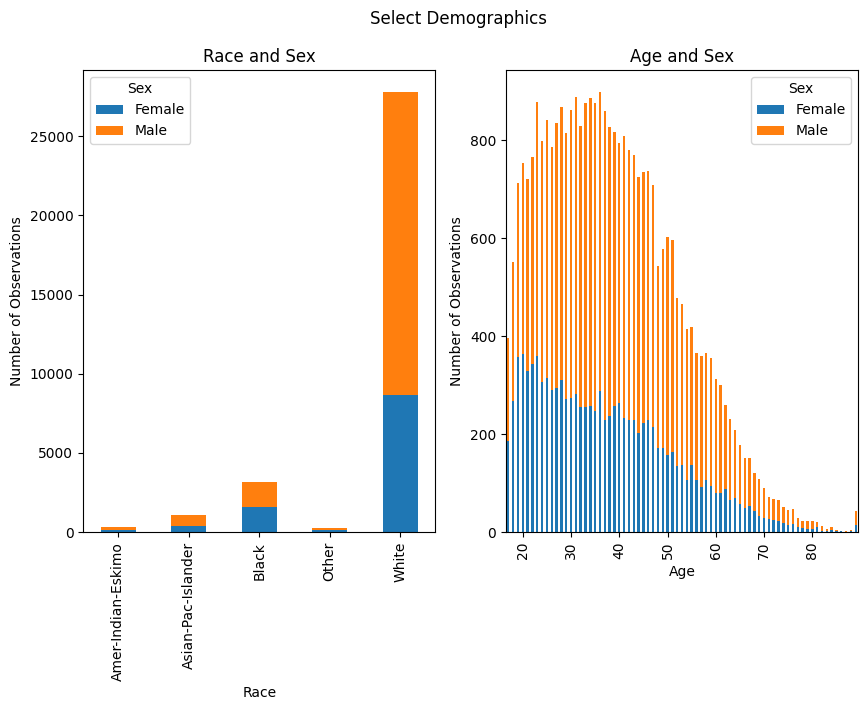

In [33]:
# Visualize some basic demographic info
s1 = df1.groupby(['race', 'sex'])['income'].count().unstack()
s2 = df1.groupby(['age', 'sex'])['income'].count().unstack()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
s1.plot(ax=ax1, kind='bar', stacked=True)
s2.plot(ax=ax2, kind='bar', stacked=True)
ax1.set_xlabel('Race')
ax1.set_ylabel('Number of Observations')
ax1.set_title('Race and Sex')
ax2.set_xticks([3, 13, 23, 33, 43, 53, 63])
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Observations')
ax2.set_title('Age and Sex')
plt.suptitle('Select Demographics')
ax1.legend(title='Sex')
ax2.legend(title='Sex')
plt.savefig('demographic.png', bbox_inches='tight')
plt.show()

# Pre-processing/building NN

In [19]:
# Check that education and education.num are equivalent. Remove one
for i in range(1, 17):
    print(df1['education'][df1['education.num']==i].unique())

df1 = df1.drop(columns=['education.num'])

['Preschool']
['1st-4th']
['5th-6th']
['7th-8th']
['9th']
['10th']
['11th']
['12th']
['HS-grad']
['Some-college']
['Assoc-voc']
['Assoc-acdm']
['Bachelors']
['Masters']
['Prof-school']
['Doctorate']


In [20]:
# One hot encoding for feature strings
string_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
df_lst = [pd.DataFrame()]*len(string_columns)
for i, col in enumerate(string_columns):
  df_lst[i] = pd.get_dummies(df1[col], prefix=col, dtype=int, drop_first=True)

In [21]:
# Label encode target to prep for keras to_categorical
target = df1['income'].astype('category').cat.rename_categories((0, 1))

In [22]:
# Create new data frame with numeric and categorical variables
string_columns.append('income')
df1a = df1.drop(columns=string_columns)
df2 = pd.concat([df1a, df_lst[0], df_lst[1], df_lst[2], df_lst[3], df_lst[4], df_lst[5], df_lst[6], df_lst[7], target], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   age                                        32561 non-null  int64   
 1   fnlwgt                                     32561 non-null  int64   
 2   capital.gain                               32561 non-null  int64   
 3   capital.loss                               32561 non-null  int64   
 4   hours.per.week                             32561 non-null  int64   
 5   workclass_Local-gov                        32561 non-null  int64   
 6   workclass_Never-worked                     32561 non-null  int64   
 7   workclass_Private                          32561 non-null  int64   
 8   workclass_Self-emp-inc                     32561 non-null  int64   
 9   workclass_Self-emp-not-inc                 32561 non-null  int64   
 10  workclass_

In [23]:
# Create X and y sets; train/test splits
X = df2.drop(columns=['income'])
y = df2['income']

X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=27)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train_raw.shape)
print('Shape of y_test: ', y_test_raw.shape)

Shape of X_train:  (26048, 96)
Shape of X_test:  (6513, 96)
Shape of y_train:  (26048,)
Shape of y_test:  (6513,)


In [24]:
# Standardize features and encode target as categorical
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)

In [47]:
# Build model: neural network with one hidden layer
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(5e-3))) # Hidden layer
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(5e-3))) # Output layer

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print('\n\n Loss', loss, 'Accuracy:', accuracy)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 6)              │           582 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596 (2.33 KB)

 Trainable params: 596 (2.33 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7822 - loss: 0.5384 - val_accuracy: 0.8389 - val_loss: 0.3895
Epoch 2/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8454 - loss: 0.3793 - val_accuracy: 0.8466 - val_loss: 0.3676
Epoch 3/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8436 - loss: 0.3652 - val_accuracy: 0.8475 - val_loss: 0.3551
Epoch 4/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.3482 - val_accuracy: 0.8508 - val_loss: 0.3469
Epoch 5/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8533 - loss: 0.3457 - val_accuracy: 0.8478 - val_loss: 0.3463
Epoch 6/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8567 - loss: 0.3382 - val_accuracy: 0.8515 - val_loss: 0.3437
Epoch 7/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8532 - loss: 0.3403 - val_accuracy: 0.8498 - val_loss: 0.3444
Epoch 8/40
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8531 - loss: 0.3406 - val_accurac

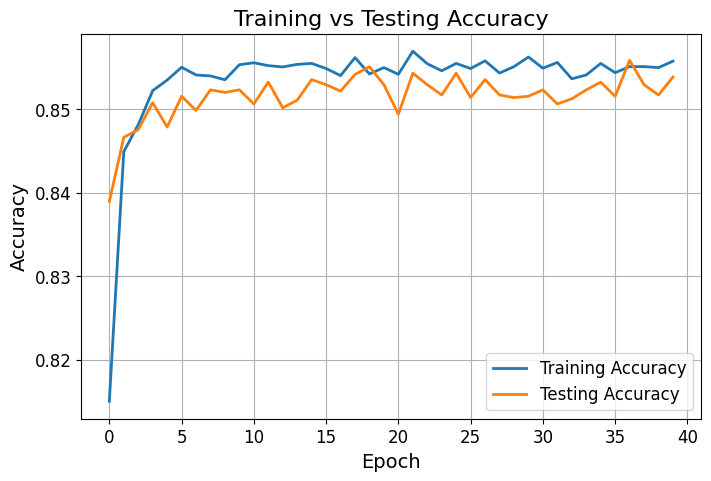

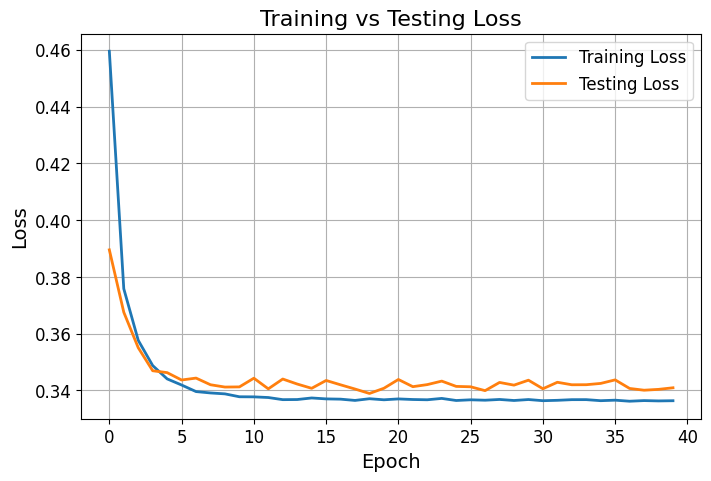

In [49]:
# Plot the accuracy and loss.
# Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], linewidth=2)
plt.plot(history.history['val_accuracy'], linewidth=2)
plt.title('Training vs Testing Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='lower right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig('nn_accuracy.png', bbox_inches='tight')
plt.show()

# Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Training vs Testing Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.savefig('nn_loss.png', bbox_inches='tight')
plt.show()